# Import modules

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# 2-substrate Monod model (e.g. carbon, nitrogen)
Ypx set to 0 (no product formation).

In [18]:
# parameter values
ms = 0.05 # g/gh
mumax = 0.8 # 1/hour
Ks = 0.01 # g/liter
Kn = 0.01 # g/liter
Yxs = 0.44 # g/g
Yxn = 8 # g/g
Ypx = 0 # g/g

# inlet flowrate
def F(t):
    return 0

# reaction rates
## specific cell growth rate (2 substrates: S, N)
def mu(S,N):
    return mumax*S*N/(Ks + S)/(Kn + N)

## cell maintenance 
def Rm(X):
    return ms*X

## cell growth rate
def Rg(X,S,N):
    return mu(S,N)*X

## product formation rate
def Rp(X,S,N):
    return Ypx*Rg(X,S,N)

# differential equations
def xdot(x,t):
    X,P,S,N,V = x
    dX = Rg(X,S,N)
    dP = Rp(X,S,N)
    dS = - Rm(X) - Rg(X,S,N)/Yxs  # substrate consumption dominated by cell growth
    dN = - Rg(X,S,N)/Yxn
    dV = F(t)
    return [dX,dP,dS,dN,dV]




## Simulation

Carbon-limited case


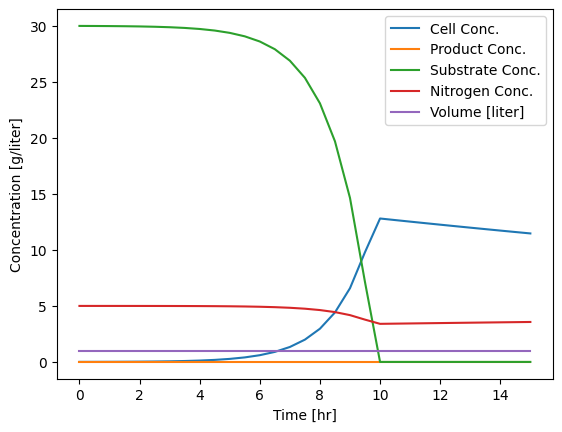

Nitrogen-limited case


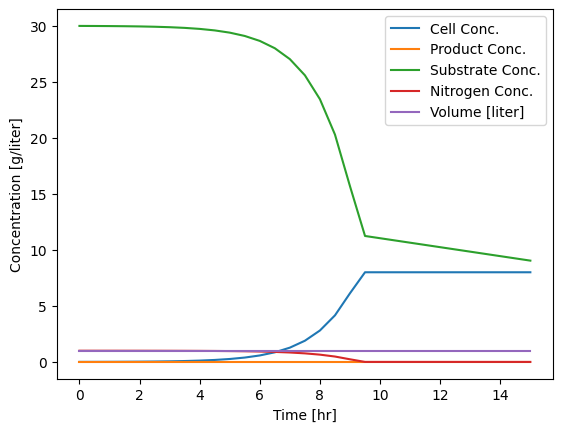

In [21]:
IC_dict = {
    'Carbon-limited case': [0.005, 0, 30, 5, 1],
    'Nitrogen-limited case': [0.005, 0, 30, 1, 1]
}
# X0, P0, S0, N0, V0

for IC_label, IC in IC_dict.items():
    t = np.linspace(0,15,31)
    sol = odeint(xdot,IC,t)
    X,P,S,N,V = sol.transpose()
    
    print(IC_label)
    plt.plot(t,X)
    plt.plot(t,P)
    plt.plot(t,S)
    plt.plot(t,N)
    plt.plot(t,V)

    plt.xlabel('Time [hr]')
    plt.ylabel('Concentration [g/liter]')
    plt.legend(['Cell Conc.',
                'Product Conc.',
                'Substrate Conc.',
                'Nitrogen Conc.',
                'Volume [liter]'])
    plt.show()
    